# Analyzing Restaurant Booking Trends with Boosting Algorithms

### Context


### Dataset Description

The dataset you will analyze contains a variety of attributes related to restaurant bookings. These details offer insights into customer preferences, booking patterns, and cancellation trends. Each booking record is characterized by several features:

### Booking Attributes:
- **id:** Unique identifier for each booking.
- **no_of_adults:** Number of adults per booking.
- **no_of_children:** Number of children per booking.
- **no_of_weekend_nights:** Number of weekend nights booked.
- **no_of_week_nights:** Number of weekday nights booked.
- **type_of_meal_plan:** Type of meal plan selected (e.g., bed and breakfast, all-inclusive).
- **required_car_parking_space:** Indicates if a parking space was required.
- **room_type_reserved:** Type of room reserved.
- **lead_time:** Number of days between the booking date and the arrival date.
- **arrival_year, arrival_month, arrival_date:** Date details for when the booking is scheduled.
- **market_segment_type:** The market segment from which the booking originated.
- **repeated_guest:** Flag indicating if the guest has booked before.
- **no_of_previous_cancellations:** Number of prior cancellations by the guest.
- **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the guest.
- **avg_price_per_room:** Average price per room type.
- **no_of_special_requests:** Number of special requests made by the guest.
- **booking_status:** Status of the booking ( confirmed = 0, canceled = 1).

Your objective is to use boosting techniques to predict the 'booking_status' and analyze factors that influence booking behaviors. This analysis will help in identifying key trends that could influence policy adjustments, promotional strategies, and operational improvements.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./../data/booking.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
ZAdu_xChd = ['no_of_adults', 'no_of_children']
len(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)] )

16

In [5]:
df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)][ZAdu_xChd].value_counts()

no_of_adults  no_of_children
0             0                 16
dtype: int64

In [6]:
df_booking_cancellations = df[df['booking_status'] == 1]
df_booking_cancellations.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
5,5,0,2,2,5,0,0,2,215,2018,10,6,1,0,0,0,212.06,0,1
6,6,2,0,0,1,2,0,0,320,2018,8,18,0,0,0,0,115.00,1,1
11,11,2,2,0,1,0,0,3,69,2018,8,12,1,0,0,0,221.30,1,1
12,12,2,1,1,1,0,0,0,50,2018,4,30,1,0,0,0,121.50,1,1


In [7]:
df.booking_status

0        0
1        0
2        0
3        0
4        1
        ..
42095    1
42096    0
42097    0
42098    0
42099    0
Name: booking_status, Length: 42100, dtype: int64

<Axes: xlabel='arrival_month,booking_status'>

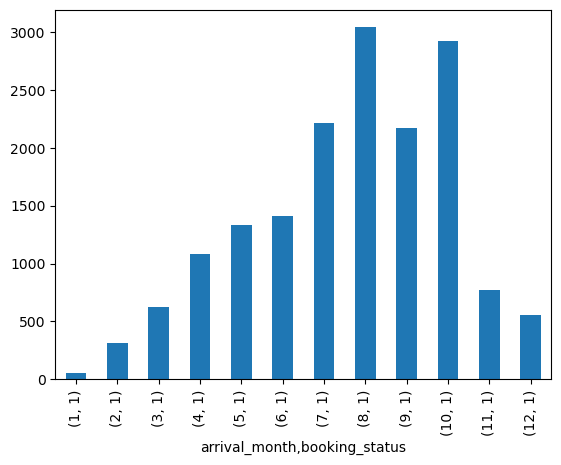

In [8]:
df_cancelled = df[df['booking_status'] == 1]
pd.DataFrame(df_cancelled.groupby(['arrival_month', 'booking_status']).count()).loc[:,'id'].plot(kind='bar')


<Axes: xlabel='arrival_month'>

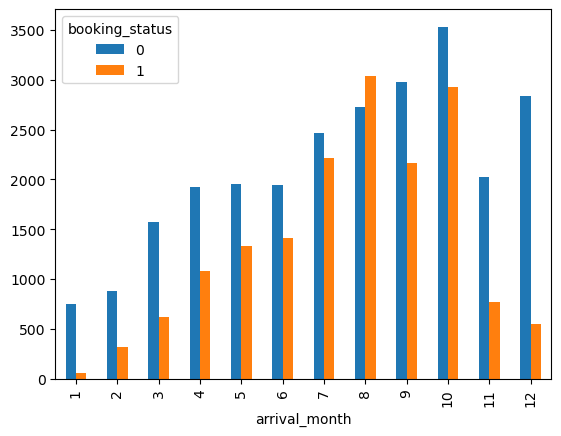

In [9]:
pd.pivot_table(index='arrival_month', columns='booking_status', data=df, aggfunc='size').plot(kind='bar')

# 3. Datatime Engineering

In [10]:
df['arrival_date']

0        14
1        29
2         2
3         1
4        16
         ..
42095    30
42096    23
42097    21
42098     9
42099    26
Name: arrival_date, Length: 42100, dtype: int64

In [11]:
df = df.rename(columns={'arrival_year':'year', 'arrival_month':'month', 'arrival_date':'day'})

In [12]:
df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'year', 'month', 'day',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df['date']= pd.to_datetime(df[['day', 'month', 'year']], errors='coerce')

In [14]:
df.drop(columns=['day', 'month', 'year'], inplace=True)

# Q4. Boosting Steps

In [20]:
import numpy as np  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  

df = pd.read_csv("./../data/booking.csv")
df.head()

# Note: Target = 'booking_status', y = df[Target] and X = df.drop(Target, axis = 1)
X = df.drop(columns=['booking_status'])
y = df['booking_status']

# Initialize weights  
weights = np.ones(len(X)) / len(X)  

# Train first weak learner  
dt1 = DecisionTreeClassifier(random_state=10, max_depth=1)  
dt1.fit(X, y)  
y_pred_1 = dt1.predict(X)  

In [22]:
df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [19]:
y_pred_1

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
# Update weights function  
def update_weights(y, y_pred, weights):  
    for i in range(len(weights)):  
        if y[i] != y_pred[i]:  
            weights[i] *= 1.5  # Increase the weight for misclassified instances  
        else:  
            weights[i] *= 0.5  # Decrease the weight for correctly classified instances  
    return weights / np.sum(weights)  # Normalize the weights  

# Apply first learner and update weights  
weights = update_weights(y, y_pred_1, weights)  

# Train second weak learner  
dt2 = DecisionTreeClassifier(random_state=10, max_depth=1)  
dt2.fit(X, y, sample_weight= weights)   # Utilize updated weights for learning for this sample_weight is used.
y_pred_2 = dt2.predict(X)  

# Combine the weak learners' predictions  
# Assuming a simple average for combination  
final_prediction = np.round((y_pred_1 + y_pred_2) / 2.0).astype(int)  

# Calculate the accuracy  
final_accuracy = accuracy_score(y, final_prediction)  
print(f"Final combined prediction accuracy: {final_accuracy}")

# Q8. Boosting Accuracy

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [77]:
df = pd.read_csv("./../data/booking.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [80]:
X = df.loc[:, df.columns!= 'booking_status']
y= df.loc[:, 'booking_status']

In [81]:
oX_train, oX_test, oy_train, oy_test = train_test_split(X, y , test_size=0.2, random_state=10)

In [82]:
print(oX_train.shape, oX_test.shape, oy_train.shape, oy_test.shape)

(33680, 18) (8420, 18) (33680,) (8420,)


In [83]:
gbc = GradientBoostingClassifier(loss='log_loss')
gbc

GradientBoostingClassifier()

In [84]:
gbc.fit(oX_train, oy_train)
y_pred = gbc.predict(oX_test)


In [85]:
accOrig = accuracy_score(y_pred, oy_test)
accOrig

0.8042755344418052

In [49]:
### Preporcess the data

In [56]:
df.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [65]:
df_prepoceed = df.rename(columns={'arrival_year':'year', 'arrival_month': 'month', 'arrival_date':'day'})


In [67]:
df_prepoceed['day'].min(), df_prepoceed['day'].max() 

(1, 31)

In [69]:
df_prepoceed['month'].min(), df_prepoceed['month'].max() 

(1, 12)

In [70]:
df_prepoceed['year'].min(), df_prepoceed['year'].max() 

(2017, 2018)

In [74]:
df_prepoceed['date'] = pd.to_datetime(df_prepoceed[['day', 'month', 'year']], errors='coerce')

In [76]:
df_prepoceed = df_prepoceed.drop(columns=['day', 'month', 'year'])

In [95]:
df_prepoceed = df_prepoceed.dropna()

In [100]:
df_prepoceed.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
date                                    0
dtype: int64

In [106]:
df_prepoceed['day'] = df_prepoceed.date.dt.day
df_prepoceed['month'] = df_prepoceed.date.dt.month
df_prepoceed['year'] = df_prepoceed.date.dt.year

C:\Users\Upendra\AppData\Local\Temp\ipykernel_30188\1856184396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepoceed['day'] = df_prepoceed.date.dt.day
C:\Users\Upendra\AppData\Local\Temp\ipykernel_30188\1856184396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepoceed['month'] = df_prepoceed.date.dt.month
C:\Users\Upendra\AppData\Local\Temp\ipykernel_30188\1856184396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [109]:
df_prepoceed.drop(columns='date', inplace=True)

C:\Users\Upendra\AppData\Local\Temp\ipykernel_30188\1362724685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepoceed.drop(columns='date', inplace=True)


In [111]:
X = df_prepoceed.loc[:, df_prepoceed.columns!= 'booking_status']
y= df_prepoceed.loc[:, 'booking_status']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=10)

In [114]:
gbc = GradientBoostingClassifier(loss='log_loss')
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accPrep = accuracy_score(y_pred, y_test)
accPrep

0.8128418549346017

In [116]:
### Ans

In [145]:

X1 = [1.2, 14.8, 0.4, 28.5, 14.1]
X2 = [1.3, 18.4, 0.38, 28.6, 9.87]
X3 = [2.05, 11.4, 0.43, 23.5, 11.5]
y = [1.8, 9.8, 0.67, 19.9, 18.1]

In [146]:
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
y = np.array(y)

In [147]:
X1 = X1.T
X2 = X2.T
X3 = X3.T
y = y.T

In [148]:
X1.T

array([ 1.2, 14.8,  0.4, 28.5, 14.1])

In [154]:
df1 = pd.DataFrame([X1, X2, X3, y], columns=['X1', 'X2', 'X3', 'X4', 'y'])
df1['y_pred1'] = df1.y.mean()

In [156]:
df1

,X1,X2,X3,X4,y,y_pred1
0,1.20,14.8,0.40,28.5,14.10,13.3925
1,1.30,18.4,0.38,28.6,9.87,13.3925
2,2.05,11.4,0.43,23.5,11.50,13.3925
3,1.80,9.8,0.67,19.9,18.10,13.3925


In [159]:
df1['res1'] = df1['y'] - df1['y_pred1']

In [161]:
df1

,X1,X2,X3,X4,y,y_pred1,res1
0,1.20,14.8,0.40,28.5,14.10,13.3925,0.7075
1,1.30,18.4,0.38,28.6,9.87,13.3925,-3.5225
2,2.05,11.4,0.43,23.5,11.50,13.3925,-1.8925
3,1.80,9.8,0.67,19.9,18.10,13.3925,4.7075


In [170]:
df = pd.DataFrame()
df['Height'] = [1.6, 1.6, 1.5, 1.8]
df['FColor'] = ['Blue', 'Green', 'Blue', 'Red' ]
df['Gender'] = ['M', 'F', 'F', 'M']
df['Weight'] = [88, 76, 56, 73]
df

,Height,FColor,Gender,Weight
0,1.6,Blue,M,88
1,1.6,Green,F,76
2,1.5,Blue,F,56
3,1.8,Red,M,73


In [172]:
df['pred1'] = df.Weight.mean()
df['res1'] = df.Weight - df.pred1
df

,Height,FColor,Gender,Weight,pred1,res1
0,1.6,Blue,M,88,73.25,14.75
1,1.6,Green,F,76,73.25,2.75
2,1.5,Blue,F,56,73.25,-17.25
3,1.8,Red,M,73,73.25,-0.25
